Skills used: Data cleaning

**Importing Libraries**

In [1]:
import pandas as pd  ## data processing, dataset file I/O (e.g. pd.read_csv)
import numpy as np   ## linear algebra
import matplotlib.pyplot as plt   ## data visualization & graphical plotting

In [7]:
import seaborn as sns             ## to visualize random distributions
import plotly.express as px       ## data visualization & graphical plotting
#import squarify                       ## Treemap plots
%matplotlib inline
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.display.float_format = '{:.2f}'.format  ## limiting the decimals in the output to 2

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

**Importing datase**t

In [3]:
df = pd.read_csv('/content/earthquake_1995-2023.csv')

In [4]:
df  # very latest data set from kaggle


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",NaN,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",NaN,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [11]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [13]:
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64



*   Location has 6 missing values, whereas, alert, continent and country have
hundreds of missing values each.
*  We'll try to find a solution for missing values in later stages of the notebook.

**Data Cleaning**

In [14]:
features = ['magnitude','depth','cdi','mmi','sig','depth']
target = 'alert'

df = df[features +[target]]

In [15]:
df.isnull().sum()

magnitude      0
depth          0
cdi            0
mmi            0
sig            0
depth          0
alert        551
dtype: int64

In [16]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 542
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  449 non-null    float64
 1   depth      449 non-null    float64
 2   cdi        449 non-null    int64  
 3   mmi        449 non-null    int64  
 4   sig        449 non-null    int64  
 5   depth      449 non-null    float64
 6   alert      449 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 28.1+ KB


Looks like dtype are totally different ,need to change dtype

**Data is cleaned**

In [18]:
df = df.astype({'cdi':'int8','mmi':'int8','sig':'int8','depth':'int16','alert':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 542
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   magnitude  449 non-null    float64 
 1   depth      449 non-null    int16   
 2   cdi        449 non-null    int8    
 3   mmi        449 non-null    int8    
 4   sig        449 non-null    int8    
 5   depth      449 non-null    int16   
 6   alert      449 non-null    category
dtypes: category(1), float64(1), int16(2), int8(3)
memory usage: 10.7 KB


**Balancin**g

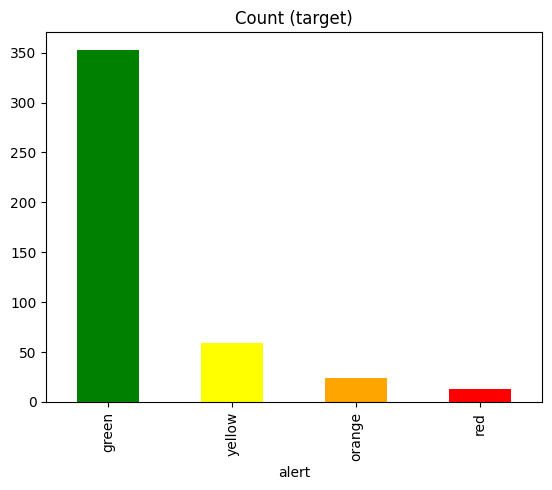

In [19]:
df[target].value_counts().plot(kind='bar', title='Count (target)', color=['green', 'yellow', 'orange', 'red']);

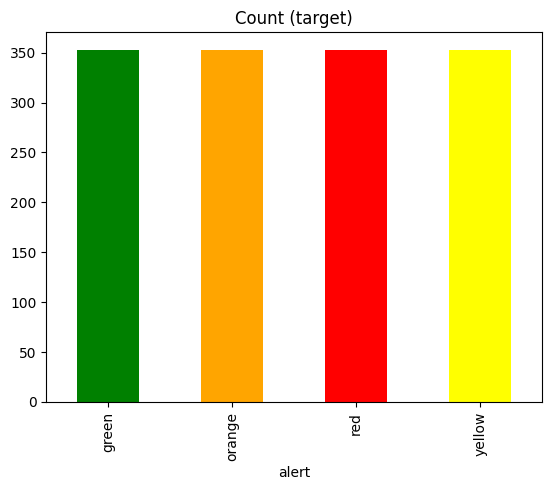

In [20]:
from imblearn.over_sampling import SMOTE
X = df[features]
y = df[target]

X = X.loc[:,~X.columns.duplicated()]


sm = SMOTE(random_state=42)
X_res, y_res= sm.fit_resample(X, y,)

y_res.value_counts().plot(kind='bar', title='Count (target)', color=['green', 'orange', 'red', 'yellow']);

**Splitting the dataset**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,random_state = 42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Modelling**

In [30]:
models = []

**Model-1 DecisionTree**

In [35]:
from sklearn.metrics import accuracy_score

In [38]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
model_dt_fit = dt.predict(X_test)

print(dt)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
models.append(dt)

DecisionTreeClassifier(random_state=42)
1.0
0.8551236749116607


**Model-2 LogisticRegressio**n

In [39]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
model_lr_fit = lr.predict(X_test)

print(lr)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
models.append(lr)


LogisticRegression(random_state=42)
0.6279893711248893
0.5936395759717314


**Model-3 KNN**

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_knn_fit = knn.predict(X_test)

print(knn)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))
models.append(knn)

KNeighborsClassifier()
0.8892825509300266
0.8303886925795053


**Model -4 GaussianNaiveBase**

In [41]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
model_gnb_fit = gnb.predict(X_test)

print(gnb)
print(gnb.score(X_train,y_train))
print(gnb.score(X_test,y_test))
models.append(gnb)

GaussianNB()
0.6554472984942427
0.6395759717314488


**Model-5 MLPClassifier**

In [43]:
mlpc = MLPClassifier(random_state=42)
mlpc.fit(X_train, y_train)
model_mlpc_fit = mlpc.predict(X_test)

print(mlpc)
print(mlpc.score(X_train,y_train))
print(mlpc.score(X_test,y_test))
models.append(mlpc)

MLPClassifier(random_state=42)
0.8219663418954827
0.7950530035335689


**Model- 6 SVC**

In [44]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
model_svm_fit = svm.predict(X_test)

print(svm)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))
models.append(svm)

SVC(random_state=42)
0.7865367581930912
0.784452296819788


**Model -7 RandomForest**

In [45]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
model_rf_fit = rf.predict(X_test)

print(rf)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
models.append(rf)

RandomForestClassifier(random_state=42)
1.0
0.8904593639575972


**Model-8 GradienBoost**

In [46]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
model_gb_fit =gb.predict(X_test)

print(gb)
print(gb.score(X_train,y_train))
print(gb.score(X_test,y_test))
models.append(gb)

GradientBoostingClassifier(random_state=42)
0.9698848538529672
0.8763250883392226


**Evaluation of Models**

In [48]:
from sklearn.metrics import f1_score

f1_scores = [f1_score(y_test, model.predict(X_test), average='weighted') for model in models]

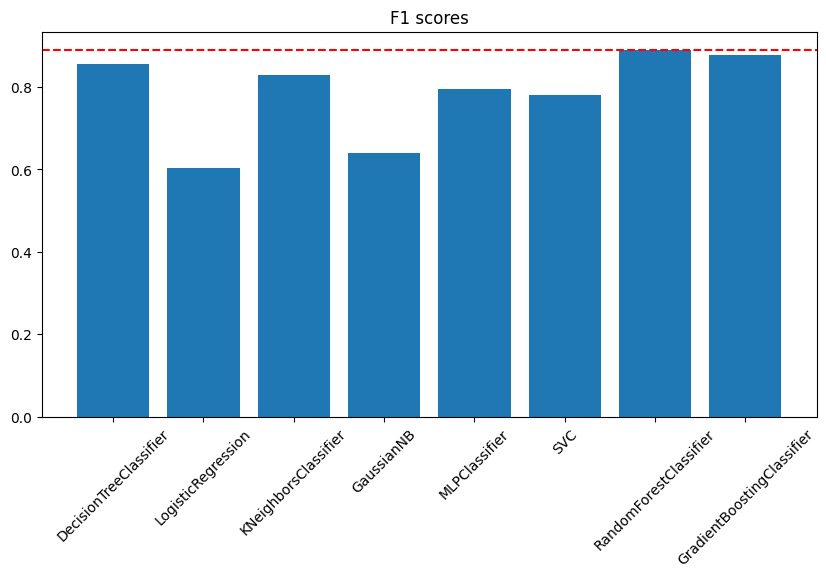

In [51]:
plt.figure(figsize=(10, 5))
plt.bar([type(model).__name__ for model in models], f1_scores)
plt.xticks(rotation=45)
plt.axhline(max(f1_scores), color='r', linestyle='--')
plt.title('F1 scores')
plt.show()

**Conclusion**

RandomForestClassifier has 100 % accuracy and GradientBoostClassifier has 96% accuracy.